# Объединенные 1, 3 и 4 задания на реальном датасете
___
## Задание:
1. **Загрузить** реальный датасет
2. **Проанализировать** данные, найти **выбросы**, **пустые значения**. 
3. **Заполнить пустые** числовые значения подходящими, используя группировку по другим столбцам. 
4. Рассчитать **корреляцию** для числовых столбцов, вывести **два столбца**, у которых наибольшая положительная корреляция. 
5. Все обложить различными **графиками** и **визуализациями**.

___
### Загружаем данные
В качестве датасета я возьму датасет Титаника с Kaggle.

In [1]:
# Подключаем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('input.csv')
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


___
### Анализируем данные
#### Предварительный анализ
Узнаем, какие зачения в нашем датасете, и сколько пустых.

In [3]:
nan_values = df.isnull().sum()
display(nan_values)
display(df.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

**Вывод:** 
- Таблица состоит из 12 столбцов и 891 строк. Из них 7 столбцов являются числовыми и 5 строковыми.
- Пропущенные значения присутствуют в столбцах Age: 177, Cabin: 687, Embarked: 2


Из источника, откуда были взяты данные, узнаем значение каждого из столбцов:
| Столбец     | Описание                                                 | Комментарий                                                                                                                         |
|-------------|----------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------|
| PassengerId | Номер пассажира                                          |                                                                                                                                     |
| Survived    | Выживаемость                                             | 0 = Не выжил, 1 = Выжил                                                                                                             |
| Pclass      | Класс билета                                             | Позволяет определить социально-экономический статус. <br/> 1 = Upper (высший), 2 = Middle (средний), 3rd = Lower (нижний)           |
| Name        | Имя                                                      |                                                                                                                                     |
| Sex         | Пол                                                      |                                                                                                                                     |
| Age         | Возраст в годах                                          | Возраст дробный, если он меньше 1. <br/>Если возраст предположительный, то он предоставлен в виде xx.5                              |
| Sibsp       | Количество братьев и сестер / супругов на борту Титаника | Sibling = брат, сестра, сводный брат, сводная сестра. <br/>Spouse = муж, жена (любовницы и женихи игнорировались)                   |
| Parch       | Количество родителей/детей на борту Титаника             | Parent = мать, отец. <br/>Child = дочь, сын, падчерица, пасынок. <br/>Некоторые дети путешествовали только с няней, для них parch=0 |
| Ticket      | Номер билета                                             |                                                                                                                                     |
| Fare        | Тариф (стоимость билета?)                                |                                                                                                                                     |
| Cabin       | Номер каюты                                              |                                                                                                                                     |
| Embarked    | Порт отправления                                         | C = Cherbourg, Q = Queenstown, S = Southampton                                                                                      |

**Предварительное предположение** по данным, хранящимся в каждом из столбцов, исходя из их описания и типа данных:
- Столбец `PassengerId` - целочисленный столбец с порядковыми данными (последовательные номера от 1 до 891 соответственно)
- Столбцы `Name`, `Ticket`, `Cabin` имеют различные строковые значения, которые не являются категориальными.
- Столбцы `Sex`, `Embarked` - категориальные строковые значения, принимающие одно из нескольких указанных значений
- Столбцы `Survived`, `Pclass`, `SibSp`, `Parch`, `Fare` - категориальные численные значения
- Столбец `Age` - числовой, принимающий значения в определенном диапазоне

Проверим эти выводы, проанализировав датасет глубже.

#### Визуализация данных
Выберем столбцы с численными значениями, чтобы провести анализ над ними

In [4]:
numeric_cols = df.select_dtypes('number').columns
display(numeric_cols)
display(df.describe())  # Анализирует именно численные значения

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Визуализируем данные с помощью гистограмм и "ящика с усами"

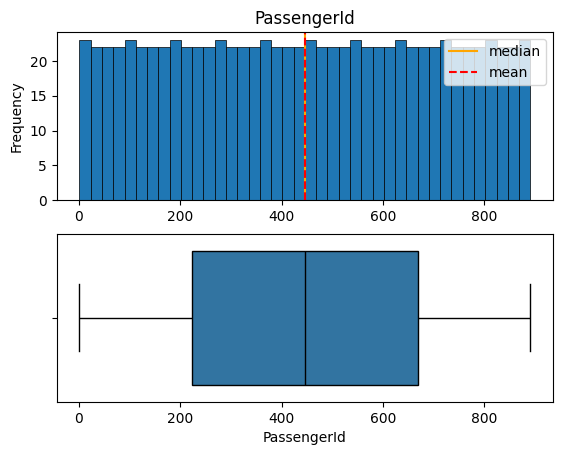

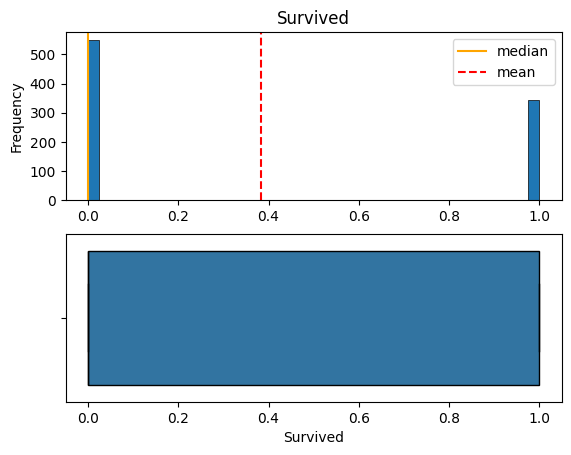

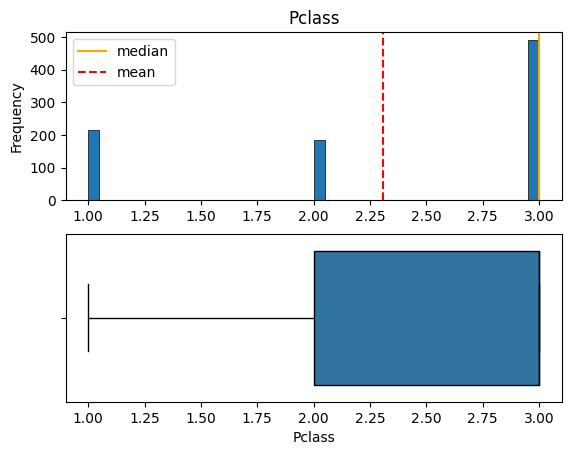

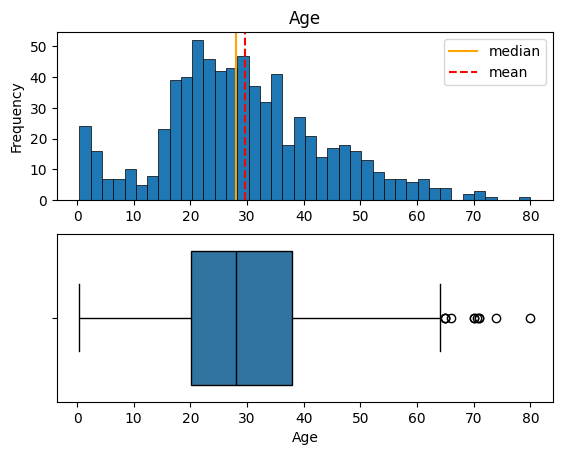

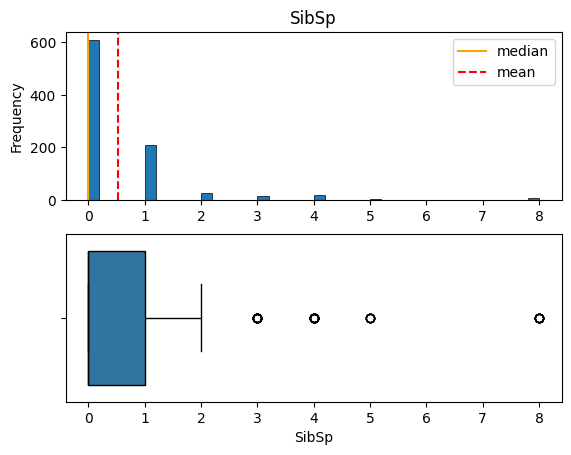

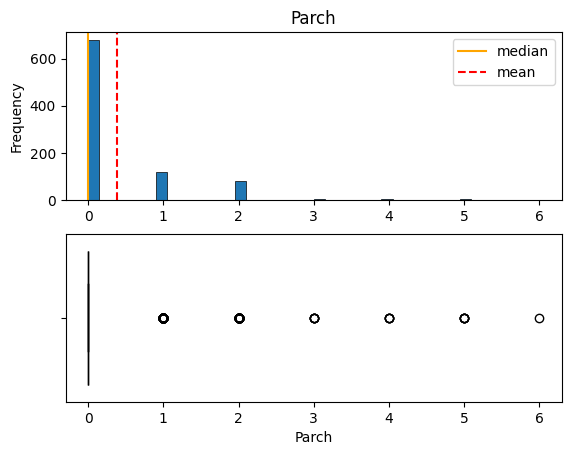

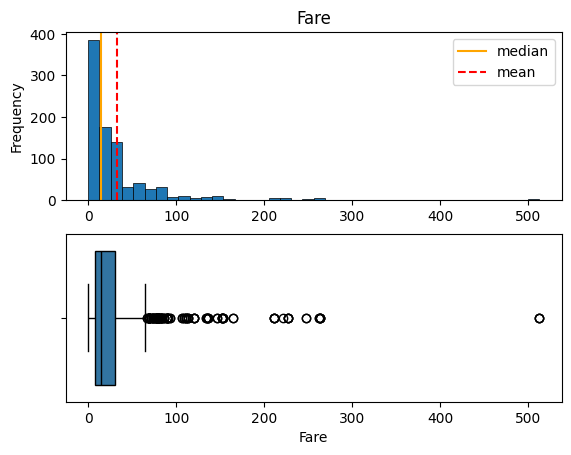

In [12]:
for col in numeric_cols:
    fig, axes = plt.subplots(2, 1)  # поле для двух графиков
    hist = df[col].plot(kind='hist', bins=40, edgecolor='k', linewidth=0.5, title=col, ax=axes[0])  # гистограмма
    median_line = hist.axvline(df[col].median(), color='orange', label='median')  # линия медианы на гистограмме
    mean_line = hist.axvline(df[col].mean(), color='r', label='mean', linestyle='dashed')  # линия среднего на гистограмме
    hist.legend(handles=[median_line, mean_line])  # легенда на гистограмме
    box_plt = sns.boxplot(df[col], orient='h', linecolor='k', ax=axes[1])  # ящик с усами
    # box_plt = df[col].plot(kind='box', vert=False, ax=axes[1])  # два других способа нарисовать ящик с усами
    # box_plt = plt.boxplot(df[col], vert=False, widths=[0.9])
    plt.show()

**Выводы:**

Тип данных:
- Предположения о столбцах `PassengerId`, `Survived`, `Pclass`, `SibSp`, `Parch`, `Age` оказались верны. 
- Однако столбец `Fare` оказался не категориальным, а числовым.

Принимаемые значения:
- `PassengerId` (номер пассажира) - принимает последовательные значения от 1 до 891 (как и предполагалось).
- `Survived` (выживаемость) - принимает значения 0 и 1 (как и предполагалось). Из них значений 0 больше (~550), а 1 меньше (~350)
- `Pclass` (класс билета) - принимает значения 1, 2 и 3 (как и предполагалось). Из них значений 3 больше всего (~500), а значений 1 и 2 примерно поровну (~200 каждый)
- `Age` (возраст) - принимает значения от 0 до 80. Это бимодальное распределение с небольшим пиком в возрасте 0 и основной модой около 20. Медианное и среднее значение смещены ближе к 30 (median = 28, mean = 29.7). В среднем значения сконцентрированы в районе 20-40 лет (первый и третий квартиль), межквартильный размах захватывает возраст примерно от 0 до 65. После 65 идут выбросы.
- `SibSp` (количество братьев с сестрами или супруг) - принимает дискретные целочисленные значения от 0 до 8. При этом большая часть значений (около 600) - это 0, на втором месте 1 (~200 значений) и изредка 2 (<50), а остальные значения являются выбросами.
- `Parch` (количество родителей/детей) - принимает дискретные целочисленные значения от 0 до 6. При этом значительное большинство значений равы 0 (~700). Остальные значения являются выбросами.
- `Fare` (тариф билета) - принимает значения от 0 до 500 (если точнее, то 512.329200). Медиана = 14.454200, среднее = 32.204208. Значения приблизительно после 60 являются выбросами.

    Форма распределения похожа на экспоненту, однако также можно заметить несколько групп значений (от 0 до 15, от 15 до 30, от 30 до 90, от 90 до 170, от 200 до 300 и один выброс на 500). Эти группы, вероятно, коррелируют со значениями других столбцов, например, с классом билета (Pclass) или с размером семьи (SibSp и Parch). Эту гипотезу можно будет проверить дальше при вычислении корреляций.

Мы также можем построить гистограммы для некоторых категориальных значений, которые не являются численными

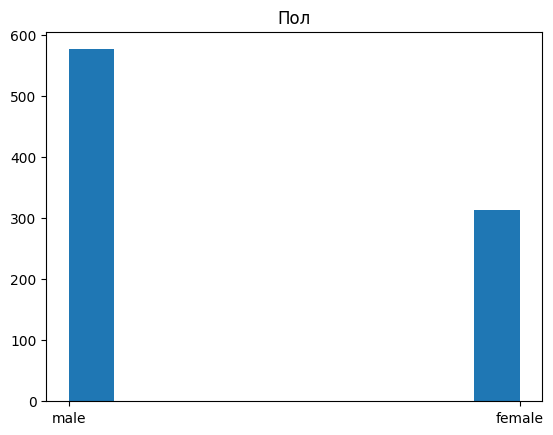

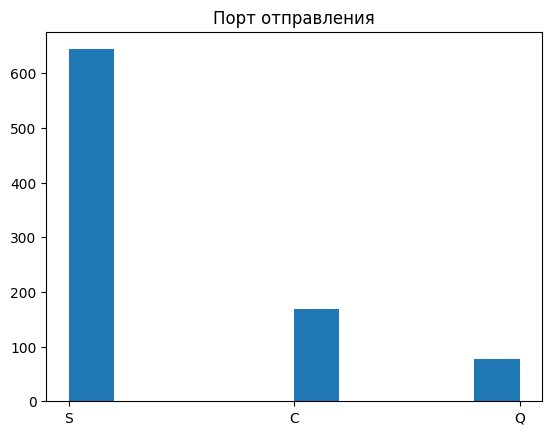

In [ ]:
df['Sex'].hist(grid=0)
plt.title('Пол')
plt.show()
df['Embarked'].hist(grid=0)
plt.title('Порт отправления')
plt.show()

**Выводы:**
- Мужчин больше, чем женщин почти в 2 раза.
- Самый популярный порт отправления среди пассажиров - 'S' (т.е. Southampton), из него отправилось более 600 человек. На втором месте 'C' (Cherbourg), чуть менее 200 человек. На третьем - 'Q' (Queenstown) - чуть менее 100.